# Cohort analysis using Python
A cohort is a group of subjects who share a common characteristic over a certain period of time. In business, cohort analysis are widdly use to track the behavior of the users. This particular example evaluate the user retention of a downloaded app. All the data are generated randomly.

In [1]:
%matplotlib inline
import random 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A total of 13 days will be considered for the example. The cohort groups involves the users that has been downloaded the app each day and the cohort period will be the days after the download. 

In [2]:
# Number of days to track
n = 13 
# Dates of download (Cohort Groups)
dates = pd.date_range('20161001',periods=n).map(lambda x: x.strftime('%Y-%m-%d'))
# Study days (Cohort Period) 
days = ["Day "+ str(d) for d in list(range(1,n+1))]

The analysis will consider the percent of the users that keep using the app each day after the download.

In [3]:
# Generate the data for analysis
data = []
for i in range(n,0,-1):
    # Generate values between 1 and 1000
    val = random.sample(range(1, 1000), i) 
    # Sort values and reverse the order 
    sorted_val = sorted(val)[::-1] 
    # Divide the data by the higher value
    # This is the number of users that download the app (day one)
    data += [[round(val/float(sorted_val[0]),3) for val in sorted_val]]

In [4]:
# Create a data frame with the generated data
retention = pd.DataFrame(data,index=dates,columns=days)
retention.index.name ='Cohort Group'
retention.columns.name = 'Cohort Period'

[Seaborn](http://seaborn.pydata.org/index.html) is a Python visualization library which provides a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) visualization that makes the magic for us.

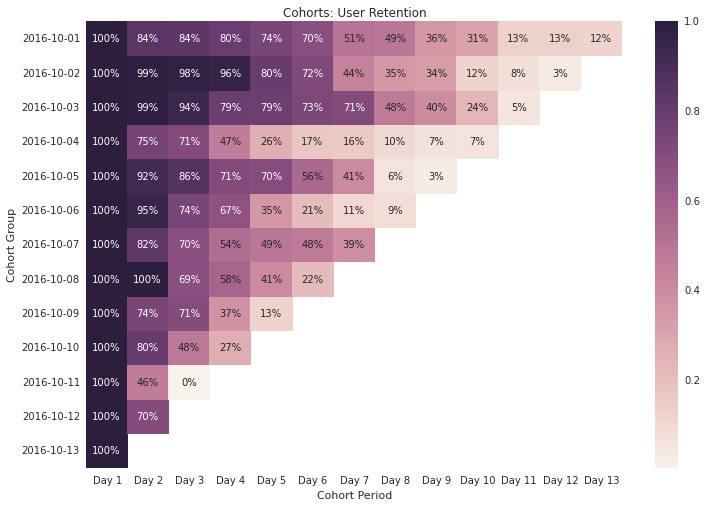

In [5]:
# Seaborn heatmap
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(retention, annot=True, fmt='.0%');
